# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction, and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Perform a linear regression using self-constructed functions
* Calculate the coefficient of determination using self-constructed functions
* Use the coefficient of determination to determine model performance

## The formulas

**Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

**R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the Python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [1]:
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 
import numpy as np 
import seaborn as sns
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=np.float64)
Y = np.array([7, 7, 8, 9, 9, 10, 10, 11, 11, 12], dtype=np.float64)


Basic Regression Diagnostics
_____________________________
Slope: 0.56
Y-Intercept: 6.33
R-Squared: 0.97
_____________________________
Model: Y =  0.56 * X + 6.33


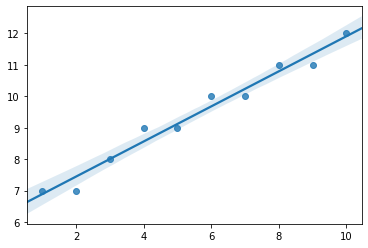

In [12]:
def calc_slope(xs, ys):
    m = (((np.mean(xs) * np.mean(ys)) - np.mean(xs*ys)) / ((np.mean(xs)**2) - np.mean(xs*xs)))
    return m 

def best_fit(xs,ys):
    m = calc_slope(xs, ys)
    c = np.mean(ys) - (m * np.mean(xs))
    return m, c

def reg_line (m,c, X):
    y = [(m*x) + c for x in X]
    return y

def sum_sq_err(ys_real, ys_predicted):
    sse = np.sum((ys_predicted - ys_real)**2)
    return sse

def r_squared(ys_real, ys_predicted):
    y_mean = [np.mean(ys_real) for y in ys_real]
    num = sum_sq_err(ys_real, ys_predicted)
    denom = sum_sq_err(ys_real, y_mean)
    return 1 - num/denom

sns.regplot(X, Y)

X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=np.float64)
Y = np.array([7, 7, 8, 9, 9, 10, 10, 11, 11, 12], dtype=np.float64)

m, c = best_fit(X, Y)
Y_pred = reg_line(m, c, X)
r_squared = r_squared(Y, Y_pred)

print('Basic Regression Diagnostics')
print('_____________________________')
print('Slope:', round(m, 2))
print("Y-Intercept:", round(c, 2))
print('R-Squared:', round(r_squared, 2))
print ('_____________________________')
print("Model: Y = ", round(m, 2), '* X +', round(c, 2))

Basic Regression Diagnostics
----------------------------
Slope: 0.56
Y-Intercept: 6.33
R-Squared: 0.97
----------------------------
Model: Y = 0.56 * X + 6.33


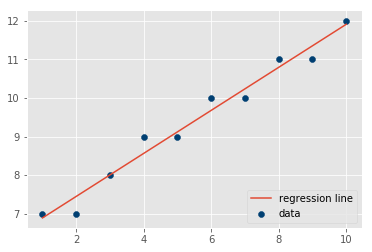

In [70]:
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

<function matplotlib.pyplot.show(*args, **kw)>

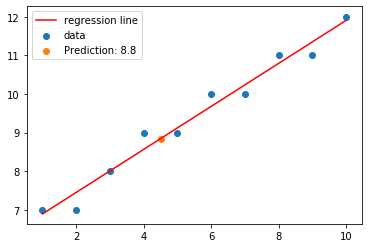

In [17]:
# Make prediction for x = 4.5 and visualize on the scatter plot
x_new = 4.5
y_new = (m*x_new) + c
y_new

import matplotlib.pyplot as plt 
%matplotlib inline 

plt.scatter(X, Y, label = 'data')
plt.plot(X, Y_pred,label = 'regression line', c = 'r')
plt.scatter(x_new, y_new, label = 'Prediction: ' + str(np.round(y_new, 1)))
plt.legend()
plt.show

## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use Python's built-in modules to perform similar analyses with a much higher level of sophistication. 

In [20]:
import pandas as pd
df = pd.read_csv('heightweight.csv')
df.head()

,height,weight
0,68,165
1,71,201
2,61,140
3,69,170
4,71,192


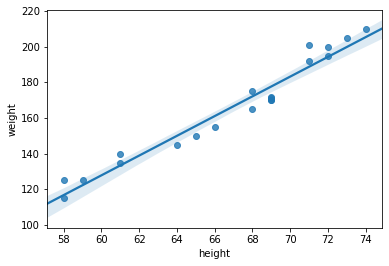

In [22]:
sns.regplot(df['height'], df['weight'])

In [23]:
m, c = best_fit(df['height'], df['weight'])
Y_pred = reg_line(m, c, df['height'])
r_squared = r_squared(df['weight'], Y_pred)

print('Basic Regression Diagnostics')
print('_____________________________')
print('Slope:', round(m, 2))
print("Y-Intercept:", round(c, 2))
print('R-Squared:', round(r_squared, 2))
print ('_____________________________')
print("Model: Y = ", round(m, 2), '* X +', round(c, 2))

TypeError: 'numpy.float64' object is not callable